# Решение Задачи "Разработка нефтегазовых месторождений"

Набор данных содержит 442 о различных нефтегазовых месторождениях.
Тренировочный набор - 309 строк.
Тестовый набор - 133 строк.

Каждое месторождение обладает 19 параметрами:
1. Field name - название месторождения
2. Reservoir unit - юнит месторождения
3. Country - страна расположения
4. Region - регион расположения
5. Basin name - название бассейна пород
6. Tectonic regime - тектонический режим
7. Latitude - широта
8. Longitude - долгота
9. Operator company - название компании
10. Onshore or oﬀshore - на суше или нет
11. Hydrocarbon type (main) - тип углеводорода
12. Reservoir status (current) - статус месторождения
13. Structural setting - структурные свойства
14. Depth (top reservoir ft TVD) - глубина
15. Reservoir period - литологический период
16. Lithology (main) - литология
17. Thickness (gross average ft) - общая толщина
18. Thickness (net pay average ft) - эффективная толщина
19. Porosity (matrix average 20. Permeability (air average mD) – проницаемость

## Считывание данных

In [78]:
from google.colab import files
# uploaded = files.upload()

БУДЬТЕ ВНИМАТЕЛЬНЫ ПРИ ЗАПУСКЕ ЯЧЕЕЙ!

запуск абсолютно всех ячеей - не гарантия решения, тут много примеров просто.

In [24]:
# иморитирование всех необходимых библиотек
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
# Считываем тренировочные данные
train = pd.read_csv("train_oil.csv")

print(f"Train dataset shape: {train.shape}")

Train dataset shape: (309, 20)


In [39]:
# Считываем тестовые данные
test = pd.read_csv("oil_test.csv")

print(f"Test dataset shape: {test.shape}")

Test dataset shape: (133, 19)


In [27]:
# Посмотрим как выглядят данные
train.head()

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ZHIRNOV,MELEKESKIAN,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION/EVAPORITE,51.0000,44.8042,NIZHNEVOLZHSKNET,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0
1,LAGOA PARDA,LAGOA PARDA (URUCUTUCA),BRAZIL,LATIN AMERICA,ESPIRITO SANTO,EXTENSION,-19.6017,-39.8332,PETROBRAS,ONSHORE,OIL,NEARLY DEPLETED,PASSIVE MARGIN,4843,PALEOGENE,SANDSTONE,2133.0,72.0,23.0,350.0
2,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION/EVAPORITE,26.0800,49.8100,SAUDI ARAMCO,ONSHORE,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
3,MURCHISON,BRENT,UK /NORWAY,EUROPE,NORTH SEA NORTHERN,EXTENSION,61.3833,1.7500,CNR,OFFSHORE,OIL,NEARLY DEPLETED,RIFT,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0
4,WEST PEMBINA,NISKU (PEMBINA L POOL),CANADA,NORTH AMERICA,WESTERN CANADA,COMPRESSION,53.2287,-115.8008,NUMEROUS,ONSHORE,OIL,UNKNOWN,FORELAND,9306,DEVONIAN,DOLOMITE,233.0,167.0,11.8,1407.0


In [28]:
len(train['Field name'].unique())
# 309
# 285 из 309 объект носят разное Field name
# слишком много различных значений

285

In [29]:
train['Onshore/Offshore'].value_counts()
# SMOTE
# imblearn
# есть дисболанс классов

ONSHORE             218
OFFSHORE             86
ONSHORE-OFFSHORE      5
Name: Onshore/Offshore, dtype: int64

## Исследование и обработка данных

Представьте, что Вы решили посмотреть фильм с друзьями. Чтобы не ошибиться с выбором и посмотреть дейтвительно хороший фильм, вы наверняка зададителсь множеством вопросов. Какой жанр у фильма? В каком году он был снят? Какой у фильма актерский состав и съемочная группа? Обычно перед просмотром люди также смотрят трейлер фильма на YouTube. Кроме того, вы бы посмотрели рейтинг фильма на imdb и обзоры фильм от других зрителей.

В любом случае, прежде чем посмотреть какой-либо фильм, вы наверняка провели небольшое исследование касательно фильма.

В анализе данных это работает примерно также и прежде чем приступить к работе данных, обычно датасаентисты исследуют что же за данные к ним пришли.

**Разведочный анализ данных (Exploratory Data Analysis, EDA)** – предварительное исследование Датасета (Dataset) с целью определения его основных характеристик, взаимосвязей между признаками, а также сужения набора методов, используемых для создания Модели (Model) Машинного обучения (Machine Learning).

**В EDA обычно включают:**
- проверку размерности данных
- исследование типов переменных
- исследование данных на пропуски
- исследование на аномальные значения (выбросы)
- исследование данных на категорильные значения
- исследование на дубликаты
- исследование взаимосвязи между переменными

и так далее.

**Исследовательский анализ данных в основном выполняется с использованием следующих методов:**

- Одномерная визуализация — предоставляет сводную статистику для каждого поля в наборе необработанных данных.
- Двумерная визуализация — выполняется, чтобы найти взаимосвязь между каждой переменной в наборе данных и интересующей целевой переменной.
- Многомерная визуализация — выполняется для понимания взаимодействий между различными полями в наборе данных.
- Уменьшение размерности — помогает понять поля данных, на которые приходится наибольшее расхождение между наблюдениями, и позволяет обрабатывать уменьшенный объем данных.

С помощью этих методов специалист по данным проверяет предположения и выявляет шаблоны, которые позволят понять проблему и выбрать модель, а также подтверждает, что данные были сгенерированы так, как ожидалось. Итак, проверяется распределение значений каждого поля, определяется количество пропущенных значений и находятся возможные способы их замены.

In [ ]:
print("Number of missing values in train dataset:")
print(train.isna().sum())
print("Number of missing values in test dataset:")
print(test.isna().sum())

Number of missing values in train dataset:
Field name                         0
Reservoir unit                     0
Country                           27
Region                            38
Basin name                        38
Tectonic regime                    0
Latitude                          27
Longitude                         30
Operator company                   0
Onshore/Offshore                   0
Hydrocarbon type                   0
Reservoir status                   0
Structural setting                 0
Depth                              0
Reservoir period                   0
Lithology                          0
Thickness (gross average ft)       0
Thickness (net pay average ft)     0
Porosity                           0
Permeability                       0
dtype: int64
Number of missing values in test dataset:
Field name                         0
Reservoir unit                     0
Country                           13
Region                            16
Basin name    

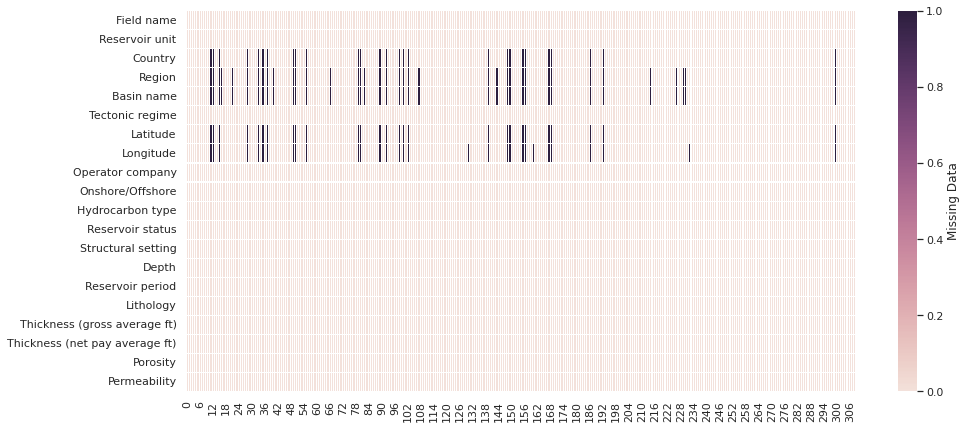

In [ ]:
plt.figure(figsize=(15,7))

cmap = sns.cubehelix_palette(as_cmap=True, light=.9)

sns.heatmap(train.isna().transpose(), cmap=cmap,
            cbar_kws={'label': 'Missing Data'}, linewidths=0.05)

plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

In [ ]:
train.dtypes

Field name                         object
Reservoir unit                     object
Country                            object
Region                             object
Basin name                         object
Tectonic regime                    object
Latitude                          float64
Longitude                         float64
Operator company                   object
Onshore/Offshore                   object
Hydrocarbon type                   object
Reservoir status                   object
Structural setting                 object
Depth                               int64
Reservoir period                   object
Lithology                          object
Thickness (gross average ft)      float64
Thickness (net pay average ft)    float64
Porosity                          float64
Permeability                      float64
dtype: object

In [6]:
# удалим все строки, в которых хотя бы один NaN
train = train.dropna()

In [7]:
# после удаления пропусков осталось 268 объектов из 309
train.shape

(268, 20)

In [8]:
train['Onshore/Offshore'].value_counts()

ONSHORE             187
OFFSHORE             77
ONSHORE-OFFSHORE      4
Name: Onshore/Offshore, dtype: int64

### BoxPlot

**Диаграммы размаха («ящик с усами») (Box and Whisker Plot или Box Plot)** – это удобный способ визуального представления групп числовых данных через квартили.

Прямые линии, исходящие из ящика, называются «усами» и используются для обозначения степени разброса (дисперсии) за пределами верхнего и нижнего квартилей. Выбросы иногда отображаются в виде отдельных точек, находящихся на одной линии с усами. Диаграммы размаха могут располагаться как горизонтально, так и вертикально.

Диаграммы размаха, как правило, используются в описательной статистике и позволяют быстро исследовать один или более наборов данных в графическом виде. Несмотря на то, что в сравнении с гистограммой или графиком плотности, этот график может показаться примитивным, его преимущество – в экономии пространства, что особенно удобно при сравнении распределений между большим количеством групп или наборов данных.

Виды наблюдений, которые можно сделать на основе ящика с усами:
- Каковы ключевые значения, например: средний показатель, медиана 25го перцентиля и так далее.
- Существуют ли выбросы и каковы их значения.
- Симметричны ли данные.
- Насколько плотно сгруппированы данные.
- Смещены ли данные и, если да, то в каком направлении.

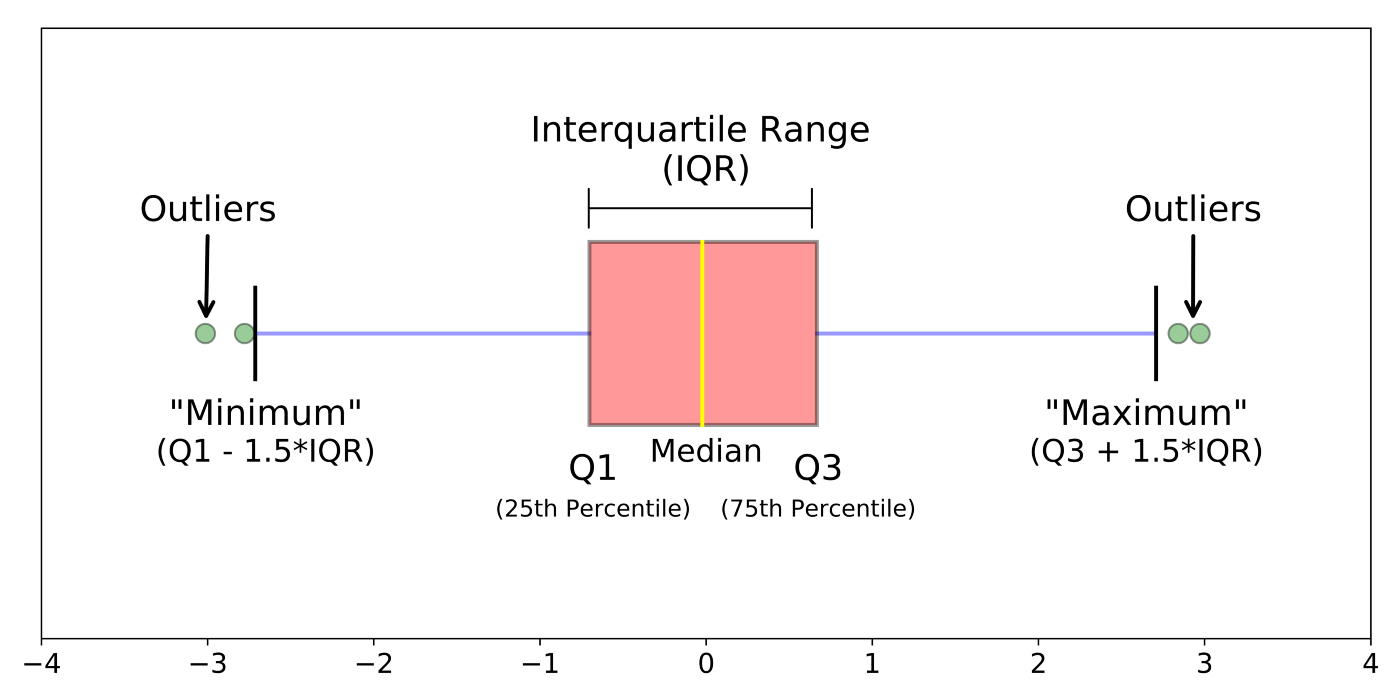

- медиана (Q2/50-й процентиль): среднее значение набора данных.
- первый квартиль (Q1/25-й процентиль): среднее число между
- наименьшим числом (не «минимум») и медианой набора данных.
- третий квартиль (Q3/75-й процентиль): среднее значение между
- медианой и максимальным значением (не «максимальным») набора данных.
- Межквартильный диапазон (IQR) : от 25-го до 75-го процентиля. IQR показывает, насколько разбросаны средние значения.
- «максимум»: Q3 + 1,5*IQR
- «минимум»: Q1 -1,5*IQR
- Выбросы : (обозначены зелеными кружками) В статистике выбросом является точка наблюдения, удаленная от других наблюдений.

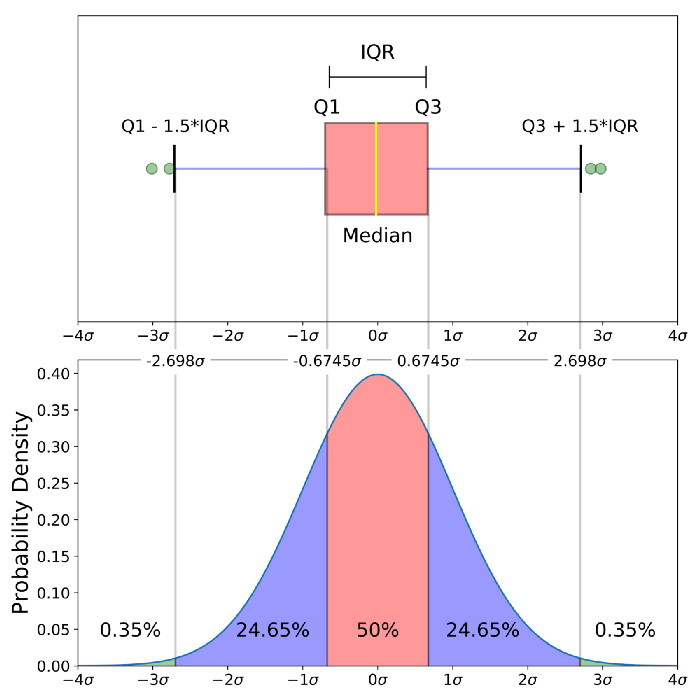

<Figure size 360x360 with 0 Axes>

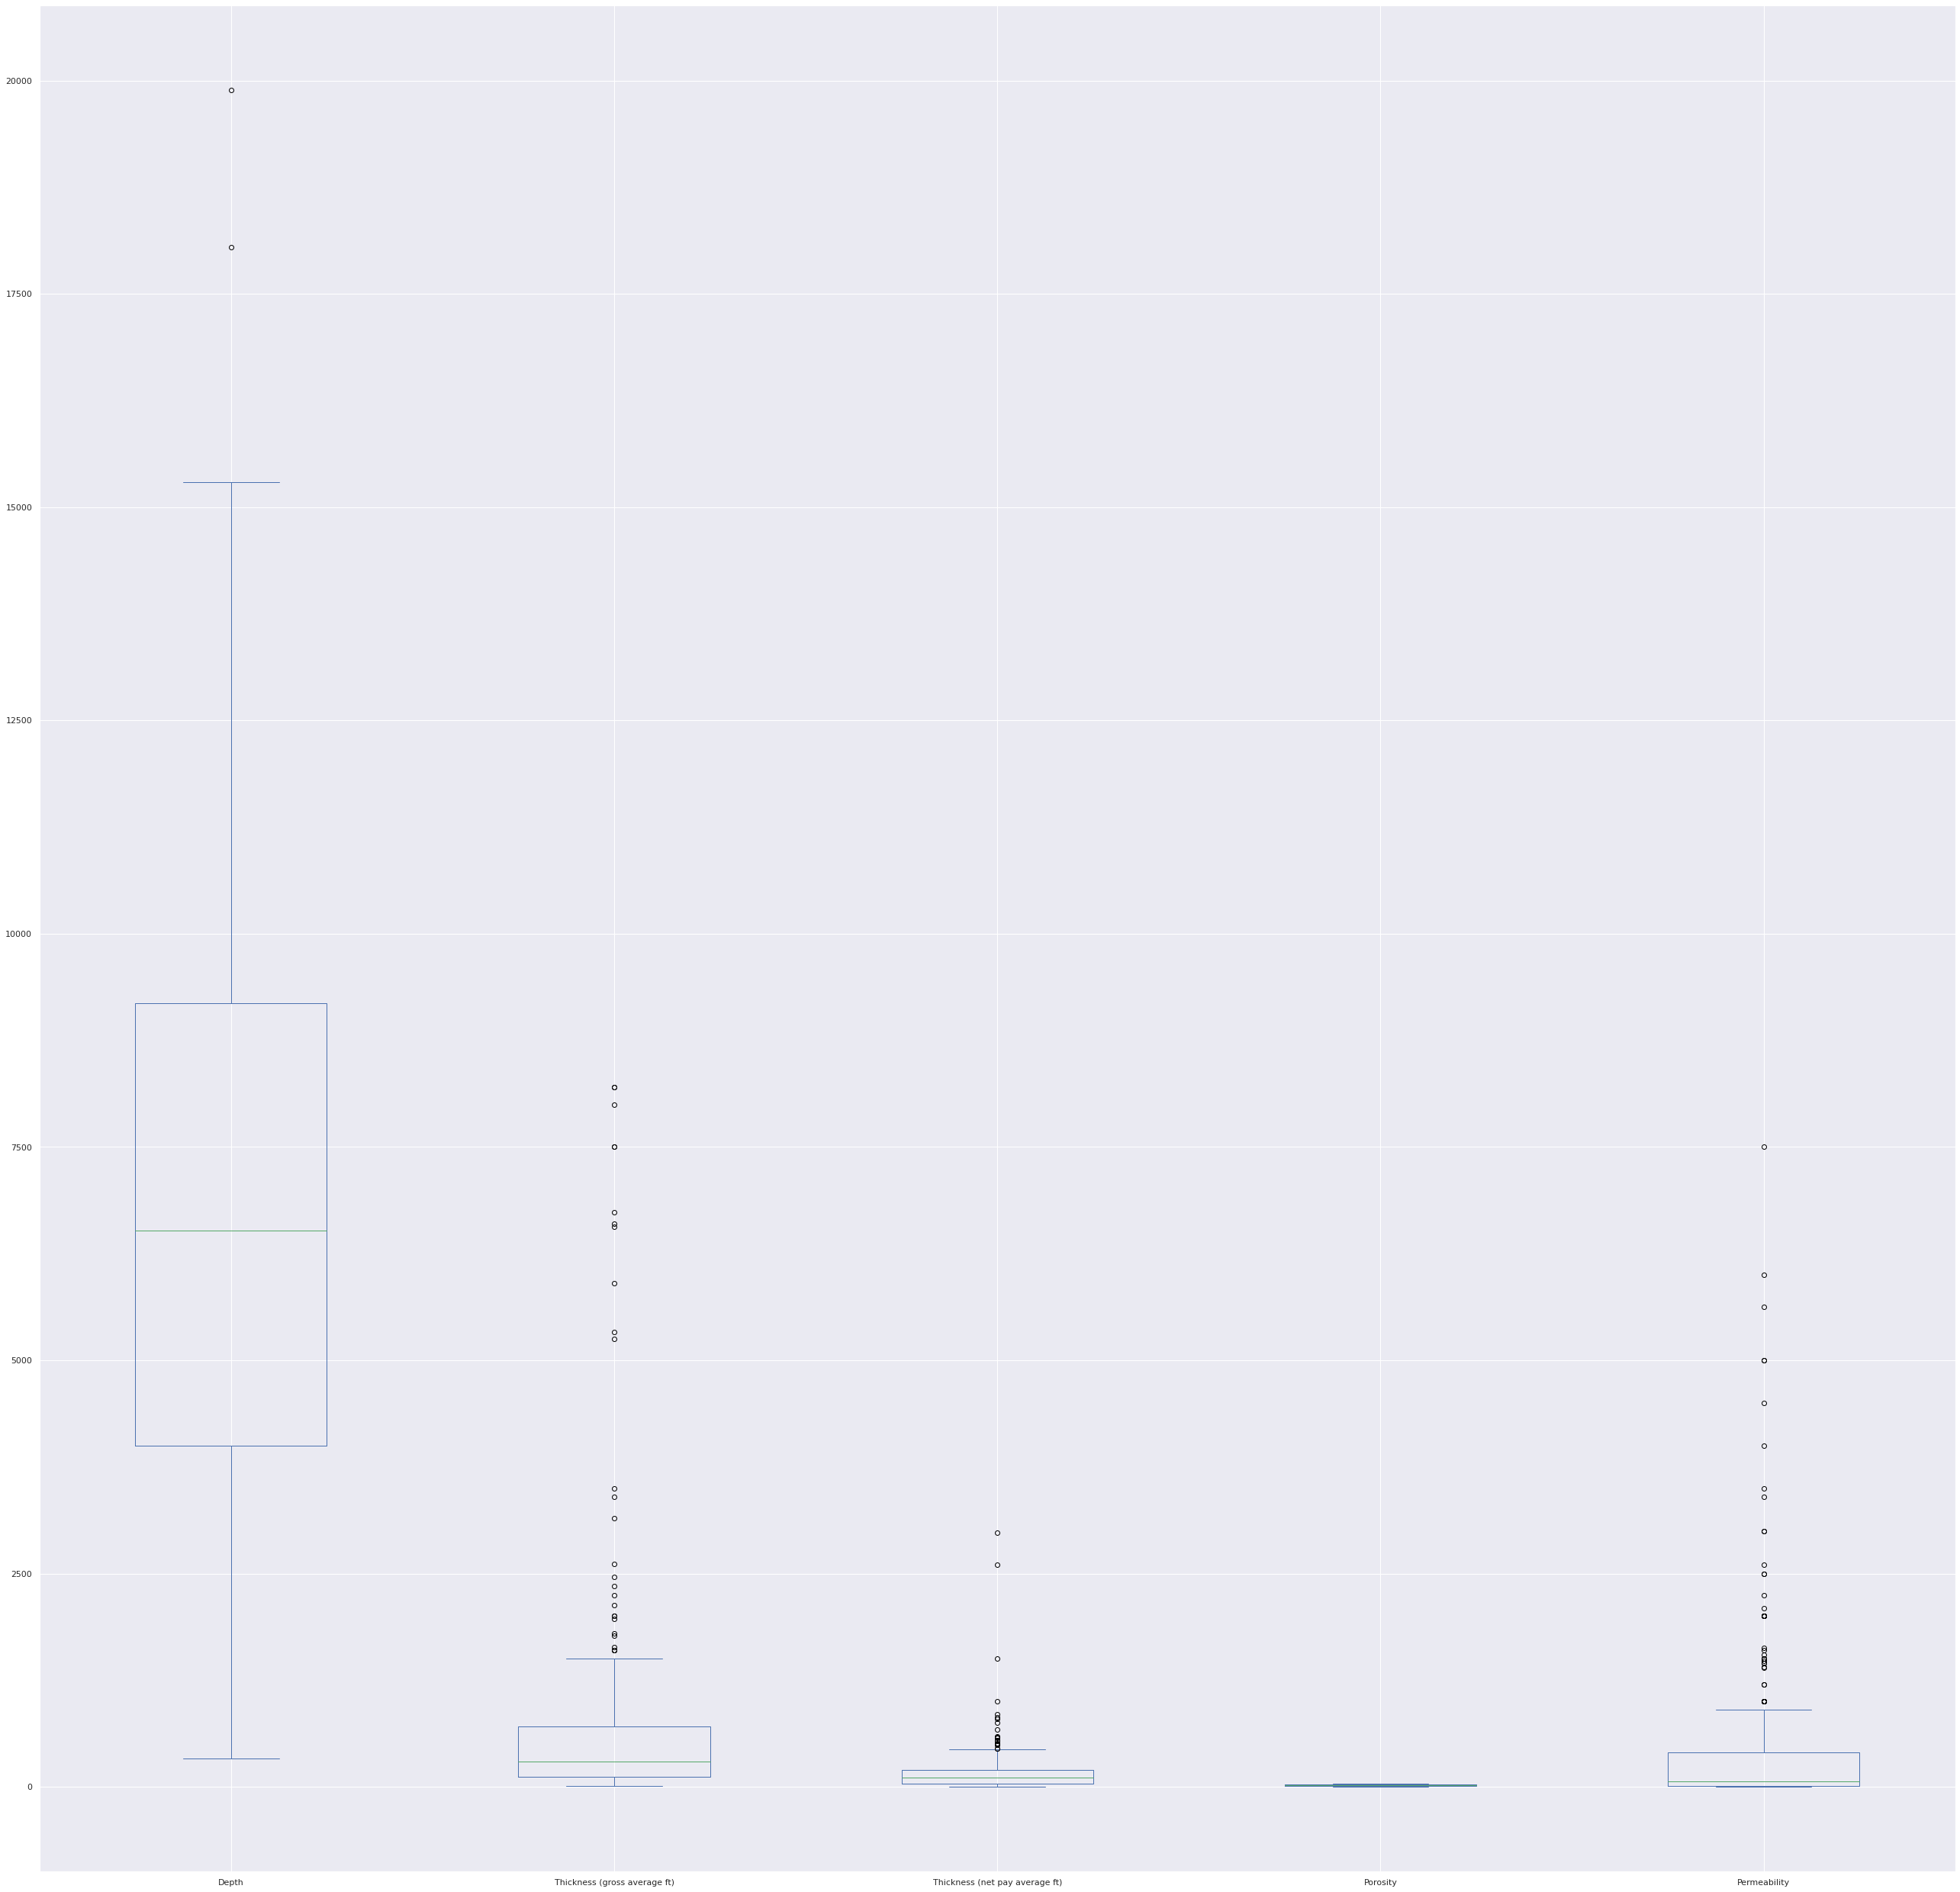

In [ ]:
plt.figure(figsize=(5,5))

train[['Depth', 'Thickness (gross average ft)', 'Thickness (net pay average ft)', 'Porosity', 'Permeability']].plot(kind='box')

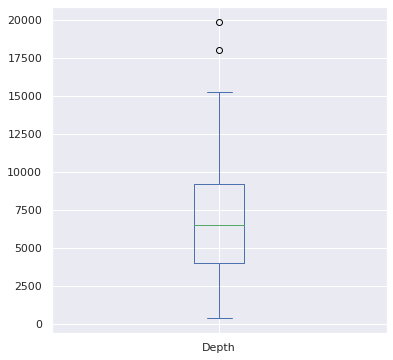

In [ ]:
_, bp = train.Depth.plot.box(return_type='both', figsize=(6,6))

In [ ]:
outliers = [flier.get_ydata() for flier in bp["fliers"]][0]
train[train.Depth.isin(outliers)]

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
224,MILLS RANCH,HUNTON (CHIMNEY HILL-HENRYHOUSE),USA,NORTH AMERICA,ANADARKO,COMPRESSION/EROSION,35.3676,-100.0793,CHEVRON,ONSHORE,GAS,NEARLY DEPLETED,THRUST,19888,SILURIAN,DOLOMITE,930.0,94.0,6.0,7.0
272,HATTERS POND,NORPHLET,USA,NORTH AMERICA,GULF OF MEXICO NORTHERN ONSHORE,GRAVITY/EXTENSION/EVAPORITE/DIAPIR/SYNSEDIMENT...,30.8976,-88.0660,CHEVRON,ONSHORE,GAS-CONDENSATE,DECLINING PRODUCTION,SALT/PASSIVE MARGIN,18050,JURASSIC,SANDSTONE,350.0,200.0,10.4,0.5


In [ ]:
# работа с квартилями

Q1 =  train.Depth.quantile(0.25)
Q3 = train.Depth.quantile(0.75)
IQR = Q3 - Q1

print(Q1)
print(IQR)
print(Q3)

train[(train.Depth < Q1-1.5*IQR ) | (train.Depth > Q3+1.5*IQR)]

4059.0
5127.0
9186.0


,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
224,MILLS RANCH,HUNTON (CHIMNEY HILL-HENRYHOUSE),USA,NORTH AMERICA,ANADARKO,COMPRESSION/EROSION,35.3676,-100.0793,CHEVRON,ONSHORE,GAS,NEARLY DEPLETED,THRUST,19888,SILURIAN,DOLOMITE,930.0,94.0,6.0,7.0
272,HATTERS POND,NORPHLET,USA,NORTH AMERICA,GULF OF MEXICO NORTHERN ONSHORE,GRAVITY/EXTENSION/EVAPORITE/DIAPIR/SYNSEDIMENT...,30.8976,-88.0660,CHEVRON,ONSHORE,GAS-CONDENSATE,DECLINING PRODUCTION,SALT/PASSIVE MARGIN,18050,JURASSIC,SANDSTONE,350.0,200.0,10.4,0.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

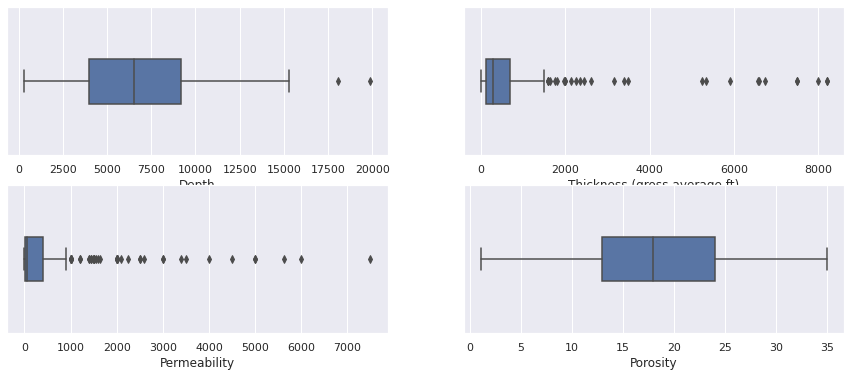

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15,6))

sns.boxplot(train['Depth'], ax=axes[0, 0], width=0.3)
sns.boxplot(train['Thickness (gross average ft)'], ax=axes[0, 1], width=0.3)
sns.boxplot(train['Permeability'], ax=axes[1,0], width=0.3)
sns.boxplot(train['Porosity'], ax=axes[1, 1], width=0.3)

https://medium.com/@agarwal.vishal819/outlier-detection-with-boxplots-1b6757fafa21

### Распределение переменных

Distplot - изображает изменение в распределении данных. Seaborn Distplot представляет собой общее распределение непрерывных переменных данных.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


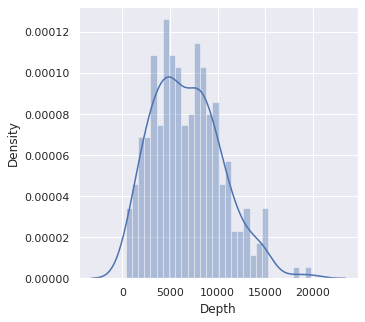

In [ ]:
plt.figure(figsize=(5,5))

sns.distplot(train['Depth'], bins=30)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

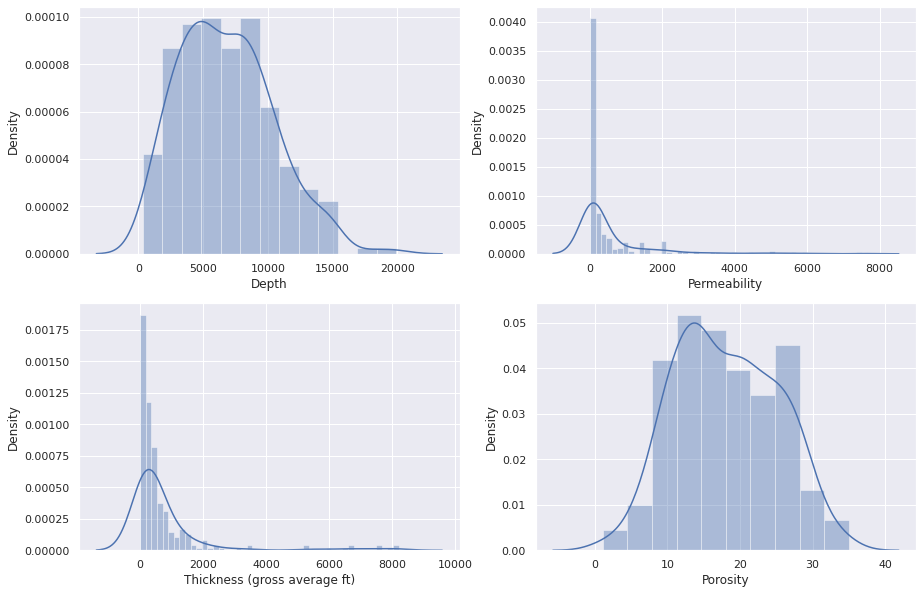

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))

sns.distplot(train['Depth'], ax=axes[0, 0])
sns.distplot(train['Permeability'], ax=axes[0, 1])
sns.distplot(train['Thickness (gross average ft)'], ax=axes[1,0])
sns.distplot(train['Porosity'], ax=axes[1, 1])

### Взаимосвязи между переменными

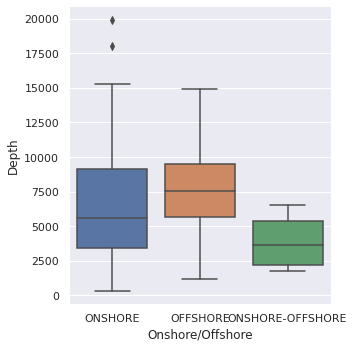

In [ ]:
sns.catplot(x="Onshore/Offshore", y="Depth", kind = "box", data=train)

Давайте взглянем на первый из таких сложных графиков, график попарных отношений , который по умолчанию создает матрицу точечных графиков. Такой график помогает нам визуализировать взаимосвязь между различными переменными в одном выводе.

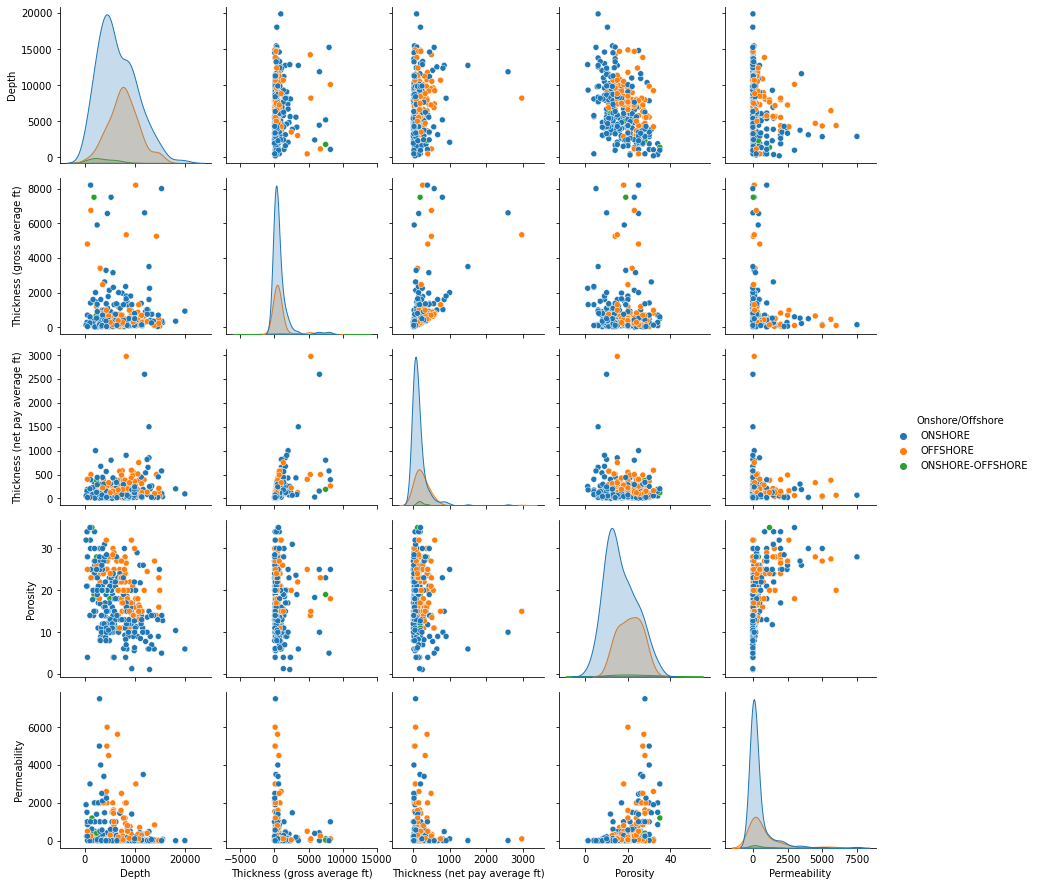

In [ ]:
tmp = train[['Depth', 'Thickness (gross average ft)', 'Thickness (net pay average ft)', 'Porosity', 'Permeability', 'Onshore/Offshore']]
sns.pairplot(tmp, hue = 'Onshore/Offshore')

### Обработка категориальных признаков

In [ ]:
train.head()

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ZHIRNOV,MELEKESKIAN,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION/EVAPORITE,51.0000,44.8042,NIZHNEVOLZHSKNET,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0
1,LAGOA PARDA,LAGOA PARDA (URUCUTUCA),BRAZIL,LATIN AMERICA,ESPIRITO SANTO,EXTENSION,-19.6017,-39.8332,PETROBRAS,ONSHORE,OIL,NEARLY DEPLETED,PASSIVE MARGIN,4843,PALEOGENE,SANDSTONE,2133.0,72.0,23.0,350.0
2,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION/EVAPORITE,26.0800,49.8100,SAUDI ARAMCO,ONSHORE,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
3,MURCHISON,BRENT,UK /NORWAY,EUROPE,NORTH SEA NORTHERN,EXTENSION,61.3833,1.7500,CNR,OFFSHORE,OIL,NEARLY DEPLETED,RIFT,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0
4,WEST PEMBINA,NISKU (PEMBINA L POOL),CANADA,NORTH AMERICA,WESTERN CANADA,COMPRESSION,53.2287,-115.8008,NUMEROUS,ONSHORE,OIL,UNKNOWN,FORELAND,9306,DEVONIAN,DOLOMITE,233.0,167.0,11.8,1407.0


In [9]:
train['Country'].value_counts()

USA                    77
CANADA                 33
CHINA                  19
UK                     19
RUSSIA                 16
NORWAY                 11
INDONESIA               9
AUSTRALIA               7
OMAN                    6
EGYPT                   6
BRAZIL                  5
FRANCE                  5
TURKMENISTAN            5
UAE                     4
INDIA                   4
VENEZUELA               4
QATAR                   3
KAZAKHSTAN              3
NIGERIA                 2
TUNISIA                 2
PAPUA NEW GUINEA        2
NEUTRAL ZONE            2
SAUDI ARABIA            2
MALAYSIA                2
LIBYA                   2
COLOMBIA                2
THAILAND                2
TUNISIA /ALGERIA        1
IRAQ                    1
DENMARK                 1
SOUTH AFRICA            1
AFGHANISTAN             1
TURKEY                  1
EQUATORIAL GUINEA       1
GABON                   1
UK /NORWAY              1
IRAN                    1
TRINIDAD AND TOBAGO     1
UZBEKISTAN  

In [ ]:
# смотрим что лежит в колонке Tectonic regime
train['Tectonic regime'].value_counts()

COMPRESSION                                                 57
EXTENSION                                                   26
COMPRESSION/EROSION                                         25
COMPRESSION/EVAPORITE                                       18
INVERSION/COMPRESSION/EXTENSION                             17
EXTENSION/EROSION                                           12
GRAVITY/EXTENSION/EVAPORITE                                 10
COMPRESSION/EVAPORITE/EXTENSION/LINKED                       7
GRAVITY/EXTENSION/EVAPORITE/SYNSEDIMENTATION                 7
INVERSION/COMPRESSION/EXTENSION/EROSION                      7
INVERSION/STRIKE-SLIP/TRANSPRESSION/EXTENSION/BASEMENT-I     5
COMPRESSION/EXTENSION/LINKED                                 4
GRAVITY/EVAPORITE/COMPRESSION                                4
INVERSION/COMPRESSION/EXTENSION/EVAPORITE                    4
GRAVITY/EVAPORITE/EXTENSION                                  4
EXTENSION/EVAPORITE/EROSION/GRAVITY                    

'COMPRESSION/EROSION' и COMPRESSION/EVAPORITE питоном и кодом воспринимаются как две разные категории, т.е.:

- COMPRESSION/EROSION - 0
- COMPRESSION/EVAPORITE - 1

Хотя по логике мы с вами понимаем, что на само деле - это должно выглядеть так:
- EROSION
- EVAPORITE
- COMPRESSION

In [10]:
# и не смотря на то, что тут 54 различных комбинаций,
# но если их распарсить через / то на самом деле там всего 16 категорий
len(train['Tectonic regime'].unique())

54

Как мы видим в колонке 'Tectonic regime' множество разных категорий, причем одному объекту может соответствовать несколько категорий сразу.

Встает вопрос как обработать такие признаки.

In [ ]:
# то же самое с колонкой 'Structural setting'
train['Structural setting'].value_counts()

FORELAND                      67
RIFT                          43
INTRACRATONIC                 27
THRUST                        14
PASSIVE MARGIN                12
SALT/FORELAND                 11
SALT/PASSIVE MARGIN            9
INVERSION/RIFT                 7
DELTA/PASSIVE MARGIN           7
INVERSION/BACKARC              6
SALT/INVERSION/RIFT            5
DELTA/SALT/PASSIVE MARGIN      5
THRUST/FORELAND                4
SUB-THRUST/FORELAND            4
RIFT/SALT                      4
RIFT/INVERSION                 3
SUB-SALT/RIFT                  3
SUB-SALT/FORELAND              3
WRENCH                         3
BACKARC                        3
SALT/RIFT                      2
FORELAND/SALT                  2
FORELAND/THRUST                2
THRUST/SUB-THRUST/FORELAND     2
SUB-SALT/INVERSION             2
SUB-THRUST                     2
WRENCH/DELTA                   2
SUB-SALT                       1
INVERSION/FORELAND             1
RIFT/PASSIVE MARGIN            1
SALT/INVER

In [ ]:
train['Basin name'].value_counts()

WESTERN CANADA                     24
GULF OF MEXICO NORTHERN ONSHORE    19
NORTH SEA CENTRAL                  14
NORTH SEA NORTHERN                 12
PERMIAN                            10
                                   ..
SIERRA GRANDE UPLIFT                1
FORT WORTH                          1
OTWAY                               1
UINTA/PICEANCE                      1
UINTA                               1
Name: Basin name, Length: 92, dtype: int64

In [ ]:
# Два вариант использования get_dummies
# эту ячейку не надо запускать :)

pd.get_dummies(train, columns=['Name']) # удаляет исходный столбец и бинарную матрицу записывает сразу в train
train['Name'].str.get_dummies() # возвращает отдельно только бинарную матрица, поэтому ее еще потом надо добавить к train

In [40]:
# раскладываем переменную Tectonic regime
# как видим получилось всего 16 колонок (а не 54!)
tmp = train['Tectonic regime'].str.get_dummies('/').add_prefix('regime_')
tmp

,regime_BASEMENT-I,regime_COMPRESSION,regime_DIAPIR,regime_EROSION,regime_EVAPORITE,regime_EXTENSION,regime_GRAVITY,regime_INVERSION,regime_LINKED,regime_REACTIVATION,regime_SHALE,regime_STRIKE-SLIP,regime_SYNSEDIMENTATION,regime_TRANSPRESSION,regime_TRANSTENSION,regime_UPLIFT
0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
305,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0
306,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
# добавляем бинарную матрицу после Get_Dummies к исходной train
# При этом исходная колонка осталась! ее потом надо удалить

train = pd.concat([train, tmp], axis=1)
train.head()

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,...,regime_GRAVITY,regime_INVERSION,regime_LINKED,regime_REACTIVATION,regime_SHALE,regime_STRIKE-SLIP,regime_SYNSEDIMENTATION,regime_TRANSPRESSION,regime_TRANSTENSION,regime_UPLIFT
0,ZHIRNOV,MELEKESKIAN,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION/EVAPORITE,51.0000,44.8042,NIZHNEVOLZHSKNET,ONSHORE,...,0,0,0,0,0,0,0,0,0,0
1,LAGOA PARDA,LAGOA PARDA (URUCUTUCA),BRAZIL,LATIN AMERICA,ESPIRITO SANTO,EXTENSION,-19.6017,-39.8332,PETROBRAS,ONSHORE,...,0,0,0,0,0,0,0,0,0,0
2,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION/EVAPORITE,26.0800,49.8100,SAUDI ARAMCO,ONSHORE,...,0,0,0,0,0,0,0,0,0,0
3,MURCHISON,BRENT,UK /NORWAY,EUROPE,NORTH SEA NORTHERN,EXTENSION,61.3833,1.7500,CNR,OFFSHORE,...,0,0,0,0,0,0,0,0,0,0
4,WEST PEMBINA,NISKU (PEMBINA L POOL),CANADA,NORTH AMERICA,WESTERN CANADA,COMPRESSION,53.2287,-115.8008,NUMEROUS,ONSHORE,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# Тоже самое и для Structural setting
tmp = train['Structural setting'].str.get_dummies('/').add_prefix('structural_')
train = pd.concat([train, tmp], axis=1)
train.head()

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,...,structural_FORELAND,structural_INTRACRATONIC,structural_INVERSION,structural_PASSIVE MARGIN,structural_RIFT,structural_SALT,structural_SUB-SALT,structural_SUB-THRUST,structural_THRUST,structural_WRENCH
0,ZHIRNOV,MELEKESKIAN,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION/EVAPORITE,51.0000,44.8042,NIZHNEVOLZHSKNET,ONSHORE,...,1,0,0,0,0,0,0,0,0,0
1,LAGOA PARDA,LAGOA PARDA (URUCUTUCA),BRAZIL,LATIN AMERICA,ESPIRITO SANTO,EXTENSION,-19.6017,-39.8332,PETROBRAS,ONSHORE,...,0,0,0,1,0,0,0,0,0,0
2,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION/EVAPORITE,26.0800,49.8100,SAUDI ARAMCO,ONSHORE,...,1,0,0,0,0,0,0,0,0,0
3,MURCHISON,BRENT,UK /NORWAY,EUROPE,NORTH SEA NORTHERN,EXTENSION,61.3833,1.7500,CNR,OFFSHORE,...,0,0,0,0,1,0,0,0,0,0
4,WEST PEMBINA,NISKU (PEMBINA L POOL),CANADA,NORTH AMERICA,WESTERN CANADA,COMPRESSION,53.2287,-115.8008,NUMEROUS,ONSHORE,...,1,0,0,0,0,0,0,0,0,0


In [56]:
# теперь сразу также обработаем test.csv!!!

tmp = test['Structural setting'].str.get_dummies('/').add_prefix('structural_')
test = pd.concat([test, tmp], axis=1)

tmp = test['Tectonic regime'].str.get_dummies('/').add_prefix('regime_')
test = pd.concat([test, tmp], axis=1)

In [14]:
train['Hydrocarbon type'].value_counts()

OIL               200
GAS                40
GAS-CONDENSATE     26
CARBON DIOXIDE      2
Name: Hydrocarbon type, dtype: int64

In [ ]:
train['Field name'].value_counts()

ERSKINE             3
LAOJUNMIAO          3
ELK BASIN           2
HIBERNIA            2
SAIH RAWL           2
                   ..
SHANSHAN            1
HUTTON NORTHWEST    1
WANGCHANG           1
IAGIFU-HEDINIA      1
WELL DRAW           1
Name: Field name, Length: 251, dtype: int64

In [ ]:
train['Reservoir unit'].value_counts()

BRENT                        8
SAN ANDRES                   7
SHUAIBA                      5
TOR-EKOFISK                  4
LEMAN SANDSTONE              4
                            ..
WATT MOUNTAIN (GILWOOD A)    1
LOWER GANCHAIGOU             1
ZELTEN                       1
BATURAJA                     1
MESAVERDE (TEAPOT SAND)      1
Name: Reservoir unit, Length: 258, dtype: int64

In [ ]:
train['Country'].value_counts()

USA                    77
CANADA                 33
CHINA                  19
UK                     19
RUSSIA                 16
NORWAY                 11
INDONESIA               9
AUSTRALIA               7
OMAN                    6
EGYPT                   6
BRAZIL                  5
FRANCE                  5
TURKMENISTAN            5
UAE                     4
INDIA                   4
VENEZUELA               4
QATAR                   3
KAZAKHSTAN              3
NIGERIA                 2
TUNISIA                 2
PAPUA NEW GUINEA        2
NEUTRAL ZONE            2
SAUDI ARABIA            2
MALAYSIA                2
LIBYA                   2
COLOMBIA                2
THAILAND                2
TUNISIA /ALGERIA        1
IRAQ                    1
DENMARK                 1
SOUTH AFRICA            1
AFGHANISTAN             1
TURKEY                  1
EQUATORIAL GUINEA       1
GABON                   1
UK /NORWAY              1
IRAN                    1
TRINIDAD AND TOBAGO     1
UZBEKISTAN  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


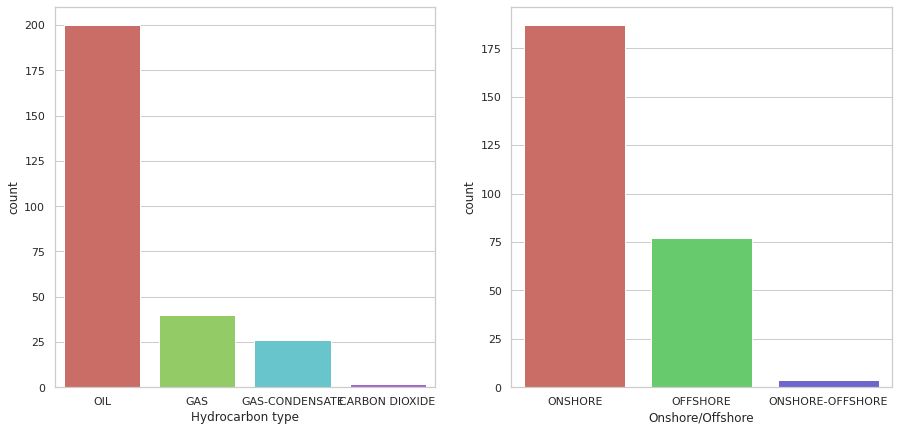

In [ ]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

fig, ax = plt.subplots(1,2, figsize=(15, 7))

sns.countplot(train['Hydrocarbon type'], ax=ax[0], palette='hls')
sns.countplot(train['Onshore/Offshore'], ax=ax[1], palette='hls')
fig.show()

In [ ]:
train['Onshore/Offshore'].value_counts()

ONSHORE             187
OFFSHORE             77
ONSHORE-OFFSHORE      4
Name: Onshore/Offshore, dtype: int64

Остальные категориальные признаки устроены проще и к ним можно применить обычные методы кодирования, которые мы изучали до этого.

Применим к ним кодировщик LabelEncoder().

In [ ]:
categ = ['Hydrocarbon type', 'Reservoir status', 'Reservoir period', 'Lithology', 'Region']

for i in categ:
    print(i)
    print(set(test[i].unique()).difference(set(train[i].unique())))
    print('-'*15)

Hydrocarbon type
{'METHANE HYDRATE', 'BITUMEN'}
---------------
Reservoir status
set()
---------------
Reservoir period
{'CAMBRIAN-ORDOVICIAN/CARBONIFEROUS', 'ARCHEAN', 'CARBONIFEROUS-CRETACEOUS', 'PALEOZOIC-CRETACEOUS', 'PERMIAN-TRIASSIC', 'PROTEROZOIC-CAMBRIAN'}
---------------
Lithology
{'CHERT', 'GLAUCONITIC SANDSTONE', 'DIATOMITE', 'BASEMENT'}
---------------
Region
{nan}
---------------


In [43]:
from sklearn import preprocessing
# Encode Categorical Columns
# создание и обучение
le = preprocessing.LabelEncoder()
train['Onshore/Offshore'] = le.fit_transform(train['Onshore/Offshore'])

train.head()

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,...,structural_FORELAND,structural_INTRACRATONIC,structural_INVERSION,structural_PASSIVE MARGIN,structural_RIFT,structural_SALT,structural_SUB-SALT,structural_SUB-THRUST,structural_THRUST,structural_WRENCH
0,ZHIRNOV,MELEKESKIAN,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION/EVAPORITE,51.0000,44.8042,NIZHNEVOLZHSKNET,1,...,1,0,0,0,0,0,0,0,0,0
1,LAGOA PARDA,LAGOA PARDA (URUCUTUCA),BRAZIL,LATIN AMERICA,ESPIRITO SANTO,EXTENSION,-19.6017,-39.8332,PETROBRAS,1,...,0,0,0,1,0,0,0,0,0,0
2,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION/EVAPORITE,26.0800,49.8100,SAUDI ARAMCO,1,...,1,0,0,0,0,0,0,0,0,0
3,MURCHISON,BRENT,UK /NORWAY,EUROPE,NORTH SEA NORTHERN,EXTENSION,61.3833,1.7500,CNR,0,...,0,0,0,0,1,0,0,0,0,0
4,WEST PEMBINA,NISKU (PEMBINA L POOL),CANADA,NORTH AMERICA,WESTERN CANADA,COMPRESSION,53.2287,-115.8008,NUMEROUS,1,...,1,0,0,0,0,0,0,0,0,0


In [34]:
mapping = dict(zip(le.classes_, range(len(le.classes_))))
mapping

{'OFFSHORE': 0, 'ONSHORE': 1, 'ONSHORE-OFFSHORE': 2}

In [46]:
print(f"Категории Hydrocarbon type в train: {train['Hydrocarbon type'].unique()}")
print(f"Категории Hydrocarbon type в test: {test['Hydrocarbon type'].unique()}")

Категории Hydrocarbon type в train: ['OIL' 'GAS' 'GAS-CONDENSATE' 'CARBON DIOXIDE']
Категории Hydrocarbon type в test: ['GAS-CONDENSATE' 'GAS' 'OIL' 'METHANE HYDRATE' 'BITUMEN']


И тут мы видим, что один и тот же признак в train.csv и в test.csv имеет разные категории, что привносит сложность(

In [49]:
print(f"Категории Period в train: {train['Reservoir status'].unique()}")
print(f"Категории Period в test: {test['Reservoir status'].unique()}")

Категории Period в train: ['DECLINING PRODUCTION' 'NEARLY DEPLETED' 'REJUVENATING' 'UNKNOWN'
 'MATURE PRODUCTION' 'PLATEAU PRODUCTION' 'DEVELOPING' 'UNDEVELOPED'
 'ABANDONED' 'SECOND PLATEAU PRODUTION' 'TEMPORARILY SHUT-IN'
 'CONTINUING DEVELOPMENT' 'DEPLETED']
Категории Period в test: ['MATURE PRODUCTION' 'DECLINING PRODUCTION' 'DEVELOPING' 'NEARLY DEPLETED'
 'UNKNOWN' 'REJUVENATING' 'UNDEVELOPED' 'PLATEAU PRODUCTION'
 'SECOND PLATEAU PRODUTION' 'CONTINUING DEVELOPMENT' 'TEMPORARILY SHUT-IN']


In [50]:
print(f"Категории Period в train: {train['Lithology'].unique()}")
print(f"Категории Period в test: {test['Lithology'].unique()}")

Категории Period в train: ['SANDSTONE' 'LIMESTONE' 'DOLOMITE' 'DOLOMITIC LIMESTONE'
 'SHALY SANDSTONE' 'THINLY-BEDDED SANDSTONE' 'CONGLOMERATE' 'SILTSTONE'
 'CHALKY LIMESTONE' 'CHALK' 'LOW-RESISTIVITY SANDSTONE' 'SHALE'
 'VOLCANICS']
Категории Period в test: ['SANDSTONE' 'LIMESTONE' 'DOLOMITE' 'CONGLOMERATE' 'SHALY SANDSTONE'
 'THINLY-BEDDED SANDSTONE' 'VOLCANICS' 'LOW-RESISTIVITY SANDSTONE'
 'SILTSTONE' 'CHALKY LIMESTONE' 'DOLOMITIC LIMESTONE' 'DIATOMITE' 'CHERT'
 'GLAUCONITIC SANDSTONE' 'CHALK' 'BASEMENT']


Соответсвенно просто применить LabelEncoder может не получится, потому что мы учим его на train и получаем словать категорий для train, но есть значения в test, который нет в train (и соответсвенно нет этой категории в словаре) и LabelEncoder не сможет закодировать.

Пример ошибки ниже:

In [35]:
from sklearn import preprocessing
# Encode Categorical Columns
# создание и обучение
le = preprocessing.LabelEncoder()
# fit обчаем для признака Hydrocarbon type на train
# transform признака в train
train['Hydrocarbon type'] = le.fit_transform(train['Hydrocarbon type'])

# для test.csv нам не нужно обучать
# нужно обученный кодировщик просто применить, т.е. transform
test['Hydrocarbon type'] = le.transform(test['Hydrocarbon type'])

train.head()

ValueError: ignored

In [51]:
# поэтому разложим все с помощью get_dummies
train = pd.get_dummies(train, columns=['Hydrocarbon type', 'Reservoir period', 'Lithology'])
train.head()

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,...,Lithology_DOLOMITE,Lithology_DOLOMITIC LIMESTONE,Lithology_LIMESTONE,Lithology_LOW-RESISTIVITY SANDSTONE,Lithology_SANDSTONE,Lithology_SHALE,Lithology_SHALY SANDSTONE,Lithology_SILTSTONE,Lithology_THINLY-BEDDED SANDSTONE,Lithology_VOLCANICS
0,ZHIRNOV,MELEKESKIAN,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION/EVAPORITE,51.0000,44.8042,NIZHNEVOLZHSKNET,1,...,0,0,0,0,1,0,0,0,0,0
1,LAGOA PARDA,LAGOA PARDA (URUCUTUCA),BRAZIL,LATIN AMERICA,ESPIRITO SANTO,EXTENSION,-19.6017,-39.8332,PETROBRAS,1,...,0,0,0,0,1,0,0,0,0,0
2,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION/EVAPORITE,26.0800,49.8100,SAUDI ARAMCO,1,...,0,0,1,0,0,0,0,0,0,0
3,MURCHISON,BRENT,UK /NORWAY,EUROPE,NORTH SEA NORTHERN,EXTENSION,61.3833,1.7500,CNR,0,...,0,0,0,0,1,0,0,0,0,0
4,WEST PEMBINA,NISKU (PEMBINA L POOL),CANADA,NORTH AMERICA,WESTERN CANADA,COMPRESSION,53.2287,-115.8008,NUMEROUS,1,...,1,0,0,0,0,0,0,0,0,0


In [55]:
# поэтому разложим все с помощью get_dummies
# тоже самое для теста
test = pd.get_dummies(test, columns=['Hydrocarbon type', 'Reservoir period', 'Lithology'])
test.head()

,Field name,Reservoir unit,Tectonic regime,Operator company,Reservoir status,Structural setting,Depth,Thickness (gross average ft),Thickness (net pay average ft),Porosity,...,Lithology_DOLOMITE,Lithology_DOLOMITIC LIMESTONE,Lithology_GLAUCONITIC SANDSTONE,Lithology_LIMESTONE,Lithology_LOW-RESISTIVITY SANDSTONE,Lithology_SANDSTONE,Lithology_SHALY SANDSTONE,Lithology_SILTSTONE,Lithology_THINLY-BEDDED SANDSTONE,Lithology_VOLCANICS
0,ABU GHARADIG,BAHARIYA,EXTENSION,GUPCO,MATURE PRODUCTION,RIFT,10282,745.0,144.0,10.0,...,0,0,0,0,0,1,0,0,0,0
1,ABU MADI-EL QARA,ABU MADI (LEVEL III),STRIKE-SLIP/TRANSTENSION/SHALE/EVAPORITE/BASEM...,IEOC,DECLINING PRODUCTION,WRENCH/DELTA,10499,509.0,410.0,20.0,...,0,0,0,0,0,1,0,0,0,0
2,ALIBEKMOLA,KT I,COMPRESSION/EVAPORITE,KAZAKHOIL AKTOBE,DEVELOPING,SUB-SALT/FORELAND,6000,300.0,105.0,10.0,...,0,0,0,1,0,0,0,0,0,0
3,ALWYN NORTH,BRENT (BRENT EAST),INVERSION/COMPRESSION/EXTENSION,TOTAL,NEARLY DEPLETED,RIFT,9790,886.0,344.0,17.0,...,0,0,0,0,0,1,0,0,0,0
4,ANKLESHWAR,ANKLESHWAR (HAZAD-ARDOL),STRIKE-SLIP/TRANSPRESSION/BASEMENT-I,ONGC,MATURE PRODUCTION,WRENCH/RIFT,2950,670.0,0.0,21.0,...,0,0,0,0,0,1,0,0,0,0


Heatmap позволяет визуадизировать матрицу корреляции между данными.

Корреляция - важнейший фактор, лежащий в основе анализа данных. Он сообщает, как переменные в наборе данных связаны друг с другом и как они перемещаются относительно друг друга. Значение корреляции колеблется от -1 до +1. 0 Корреляция означает, что две переменные не зависят друг от друга. Положительная корреляция указывает на то, что переменные движутся в одном направлении, а отрицательная корреляция указывает на противоположное.

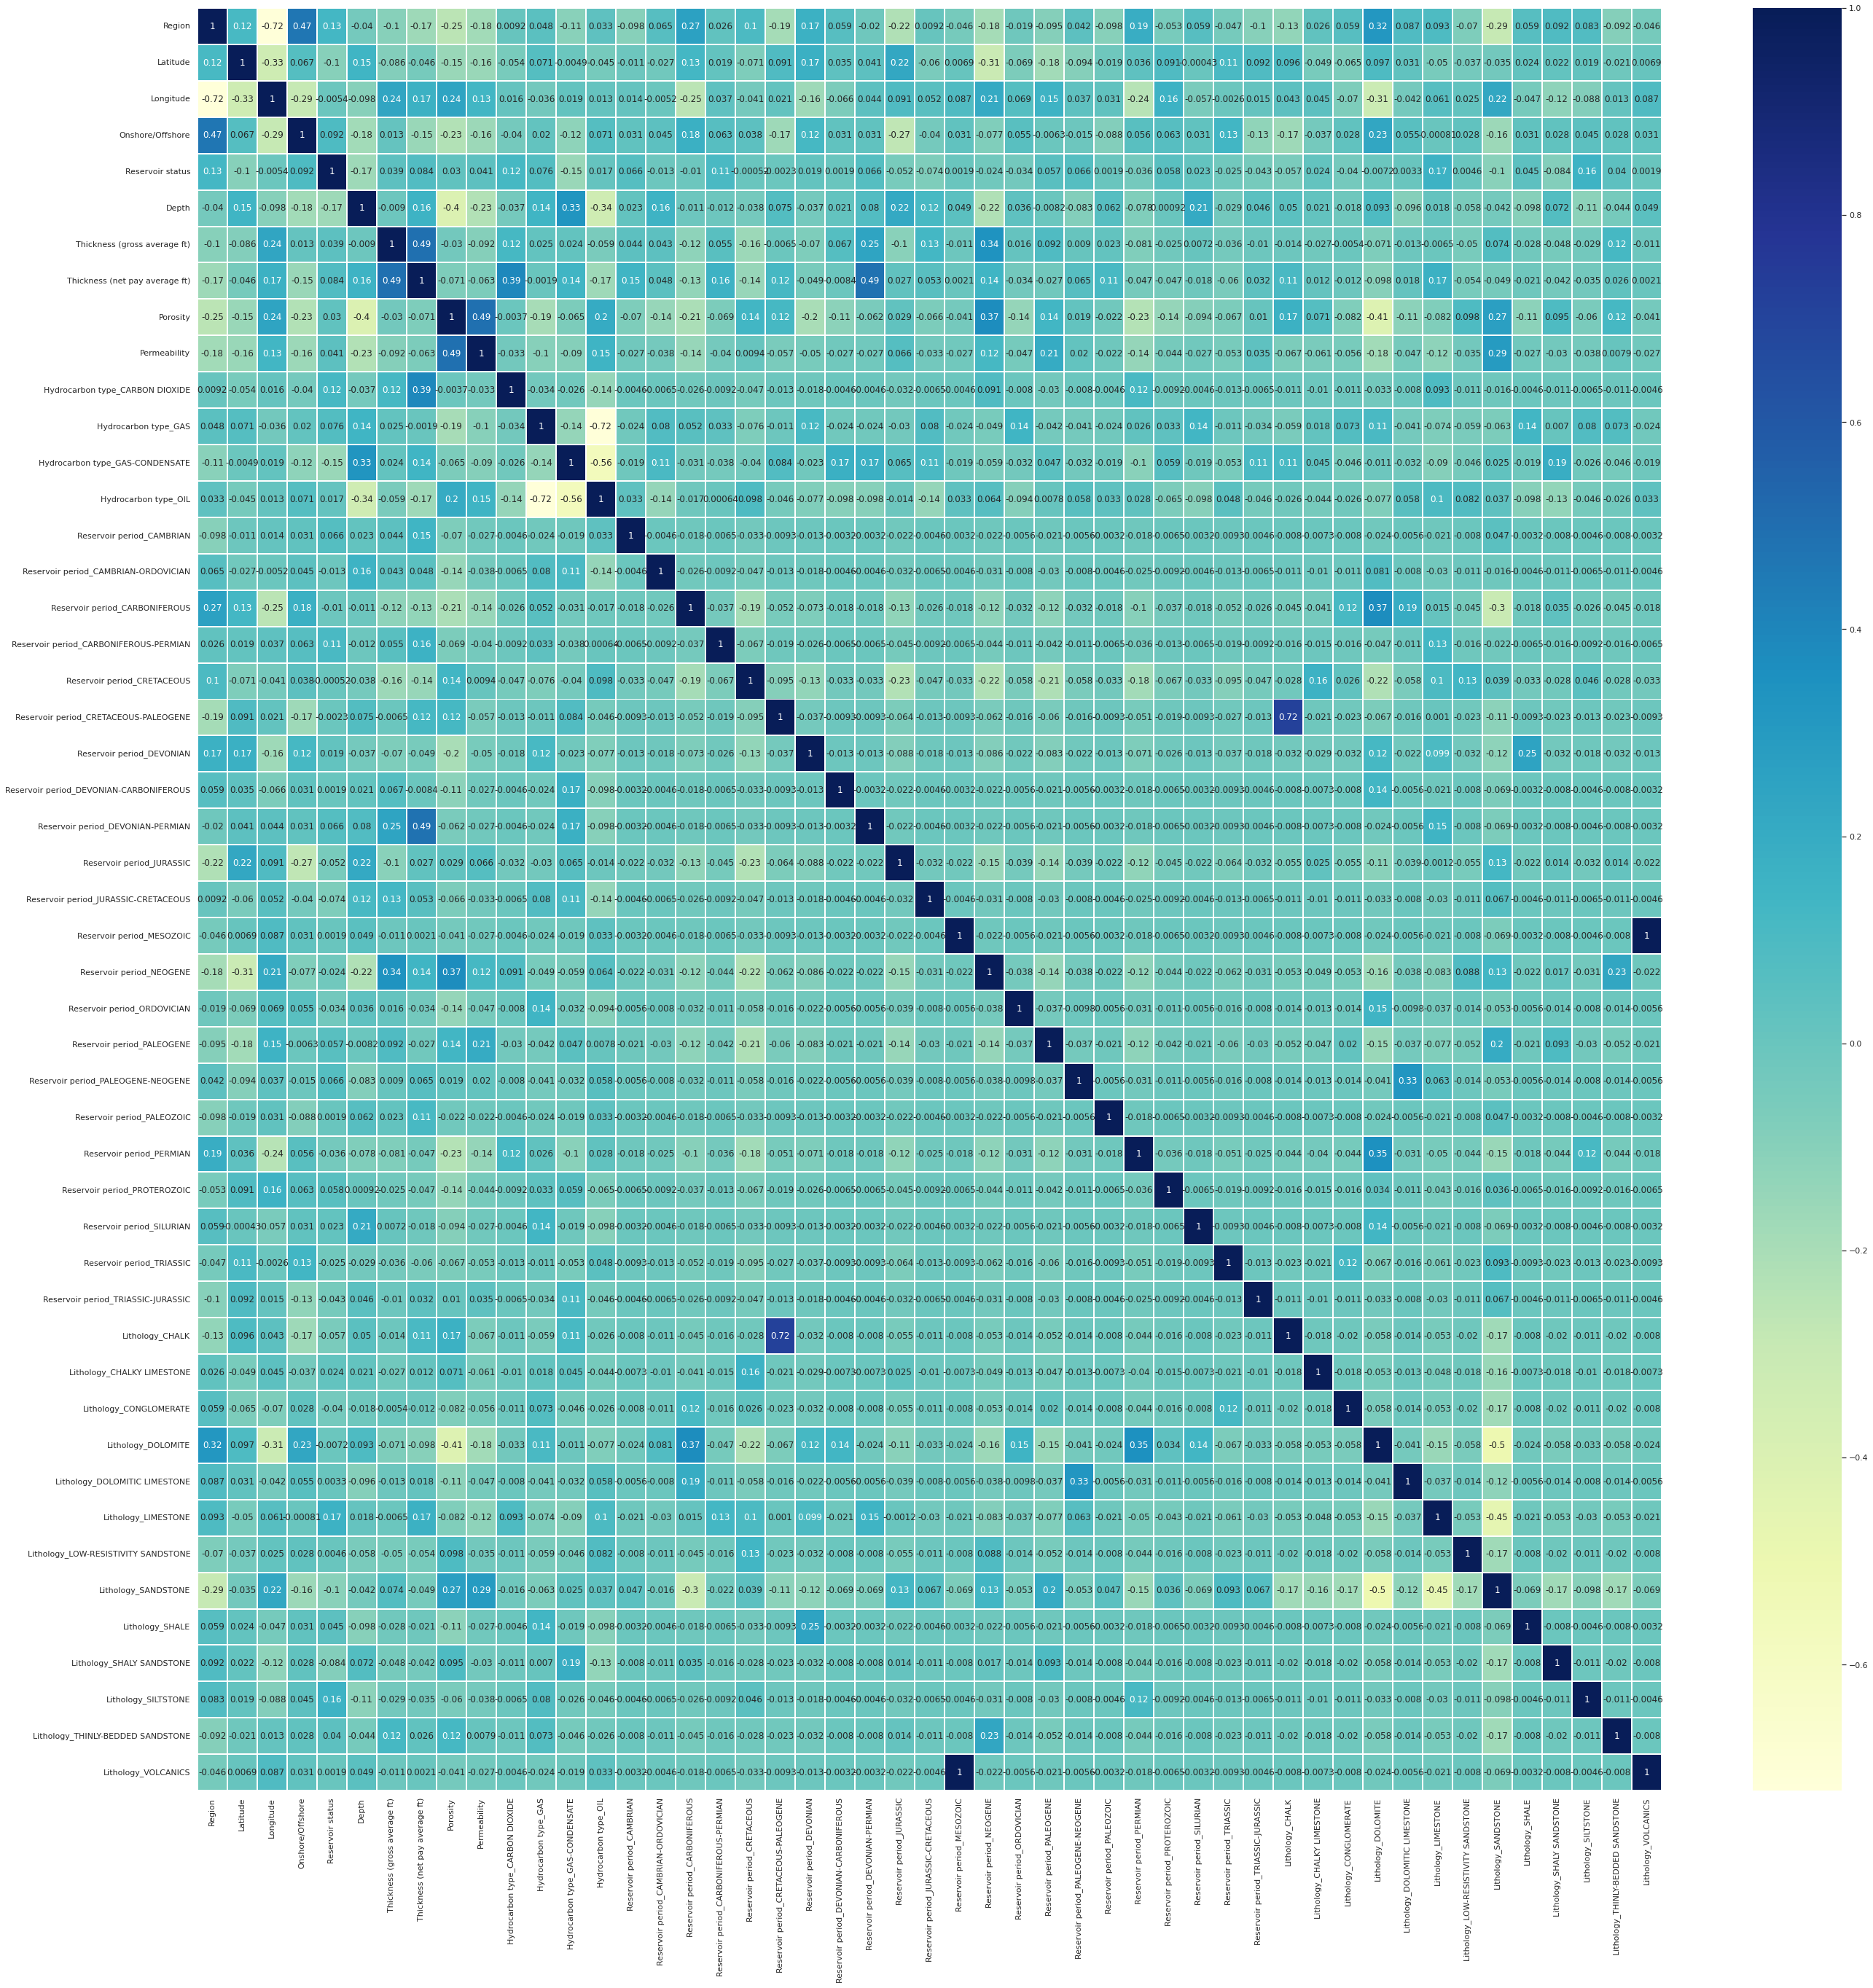

In [ ]:
sns.set(rc = {'figure.figsize':(45,45)})

sns.heatmap(crr, annot = True, cmap="YlGnBu", linecolor='white',linewidths=1)

plt.savefig("heatmap.png")

По сути, это сетка цветных квадратов , где каждый квадрат, или bin , отмечает пересечение значений двух переменных, которые простираются вдоль горизонтальной и вертикальной осей.

Цветовые палитры: https://seaborn.pydata.org/tutorial/color_palettes.html

Информация о HeatMap: https://seaborn.pydata.org/generated/seaborn.heatmap.html


In [ ]:
train.columns

Index(['Field name', 'Reservoir unit', 'Country', 'Region', 'Basin name',
       'Latitude', 'Longitude', 'Operator company', 'Onshore/Offshore',
       'Reservoir status', 'Depth', 'Thickness (gross average ft)',
       'Thickness (net pay average ft)', 'Porosity', 'Permeability',
       'Hydrocarbon type_CARBON DIOXIDE', 'Hydrocarbon type_GAS',
       'Hydrocarbon type_GAS-CONDENSATE', 'Hydrocarbon type_OIL',
       'Reservoir period_CAMBRIAN', 'Reservoir period_CAMBRIAN-ORDOVICIAN',
       'Reservoir period_CARBONIFEROUS',
       'Reservoir period_CARBONIFEROUS-PERMIAN', 'Reservoir period_CRETACEOUS',
       'Reservoir period_CRETACEOUS-PALEOGENE', 'Reservoir period_DEVONIAN',
       'Reservoir period_DEVONIAN-CARBONIFEROUS',
       'Reservoir period_DEVONIAN-PERMIAN', 'Reservoir period_JURASSIC',
       'Reservoir period_JURASSIC-CRETACEOUS', 'Reservoir period_MESOZOIC',
       'Reservoir period_NEOGENE', 'Reservoir period_ORDOVICIAN',
       'Reservoir period_PALEOGENE', 'Reservoi

Посмотрим на баланс классов.

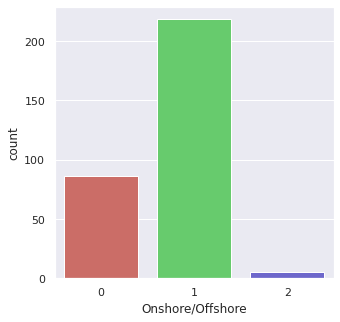

In [ ]:
sns.set(rc = {'figure.figsize':(5,5)})
y_data = pd.DataFrame(train['Onshore/Offshore'])
sns.countplot(x='Onshore/Offshore', data=y_data, palette='hls')
plt.show()

In [ ]:
train.head()

,Field name,Reservoir unit,Country,Region,Basin name,Latitude,Longitude,Operator company,Onshore/Offshore,Reservoir status,...,Lithology_DOLOMITE,Lithology_DOLOMITIC LIMESTONE,Lithology_LIMESTONE,Lithology_LOW-RESISTIVITY SANDSTONE,Lithology_SANDSTONE,Lithology_SHALE,Lithology_SHALY SANDSTONE,Lithology_SILTSTONE,Lithology_THINLY-BEDDED SANDSTONE,Lithology_VOLCANICS
0,ZHIRNOV,MELEKESKIAN,RUSSIA,3,VOLGA-URAL,51.0000,44.8042,NIZHNEVOLZHSKNET,1,2,...,0,0,0,0,1,0,0,0,0,0
1,LAGOA PARDA,LAGOA PARDA (URUCUTUCA),BRAZIL,4,ESPIRITO SANTO,-19.6017,-39.8332,PETROBRAS,1,6,...,0,0,0,0,1,0,0,0,0,0
2,ABQAIQ,ARAB D,SAUDI ARABIA,5,THE GULF,26.0800,49.8100,SAUDI ARAMCO,1,8,...,0,0,1,0,0,0,0,0,0,0
3,MURCHISON,BRENT,UK /NORWAY,1,NORTH SEA NORTHERN,61.3833,1.7500,CNR,0,6,...,0,0,0,0,1,0,0,0,0,0
4,WEST PEMBINA,NISKU (PEMBINA L POOL),CANADA,6,WESTERN CANADA,53.2287,-115.8008,NUMEROUS,1,12,...,1,0,0,0,0,0,0,0,0,0


### Обработка пропусков

In [ ]:
train.isna().sum()

Field name                         0
Reservoir unit                     0
Country                           27
Region                            38
Basin name                        38
Tectonic regime                    0
Latitude                          27
Longitude                         30
Operator company                   0
Onshore/Offshore                   0
Hydrocarbon type                   0
Reservoir status                   0
Structural setting                 0
Depth                              0
Reservoir period                   0
Lithology                          0
Thickness (gross average ft)       0
Thickness (net pay average ft)     0
Porosity                           0
Permeability                       0
dtype: int64

In [ ]:
train[train['Onshore/Offshore'] == 'ONSHORE-OFFSHORE']

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
64,WYTCH FARM,SHERWOOD,UK,EUROPE,WESSEX,INVERSION/COMPRESSION/EXTENSION,50.6672,-2.0278,BP,ONSHORE-OFFSHORE,OIL,DECLINING PRODUCTION,RIFT/INVERSION,4954,TRIASSIC,SANDSTONE,525.0,150.0,18.0,100.0
92,TIA JUANA,LA ROSA-LAGUNILLAS (TIA JUANA ONSHORE AREA),NaN,NaN,NaN,COMPRESSION/EROSION,NaN,NaN,PDVSA,ONSHORE-OFFSHORE,OIL,MATURE PRODUCTION,WRENCH/FORELAND,1400,NEOGENE,SANDSTONE,500.0,120.0,35.0,1200.0
134,CHELEKEN,RED SERIES,TURKMENISTAN,FORMER SOVIET UNION,CASPIAN SOUTH,COMPRESSION/EVAPORITE/EXTENSION/LINKED,39.5800,53.1300,TURKMENNEFT,ONSHORE-OFFSHORE,OIL,MATURE PRODUCTION,THRUST,1800,NEOGENE,SANDSTONE,7500.0,190.0,19.0,30.0
185,PARENTIS,UNNAMED,FRANCE,EUROPE,AQUITAINE,COMPRESSION/EROSION,44.3367,-1.0959,VERMILION,ONSHORE-OFFSHORE,OIL,NEARLY DEPLETED,FORELAND,6550,CRETACEOUS,DOLOMITE,1300.0,200.0,11.0,10.0
220,HUNTINGTON BEACH,JONES ZONE,USA,NORTH AMERICA,LOS ANGELES,STRIKE-SLIP/TRANSPRESSION/BASEMENT-I,33.6998,-118.0335,NUMEROUS,ONSHORE-OFFSHORE,OIL,NEARLY DEPLETED,WRENCH,2326,NEOGENE,THINLY-BEDDED SANDSTONE,700.0,375.0,28.0,400.0


In [54]:
train = train.drop(columns=['Country', 'Basin name', 'Region', 'Longitude', 'Latitude'])
test = test.drop(columns=['Country', 'Basin name', 'Region', 'Longitude', 'Latitude'])

In [53]:
train.isna().sum()

Field name                           0
Reservoir unit                       0
Tectonic regime                      0
Operator company                     0
Onshore/Offshore                     0
                                    ..
Lithology_SHALE                      0
Lithology_SHALY SANDSTONE            0
Lithology_SILTSTONE                  0
Lithology_THINLY-BEDDED SANDSTONE    0
Lithology_VOLCANICS                  0
Length: 80, dtype: int64

Удалим все ненужные признаки, или признаки которые уже обработали, но исходная колонка осталась

In [59]:
train.head(2)

,Field name,Reservoir unit,Tectonic regime,Operator company,Onshore/Offshore,Reservoir status,Structural setting,Depth,Thickness (gross average ft),Thickness (net pay average ft),...,Lithology_DOLOMITE,Lithology_DOLOMITIC LIMESTONE,Lithology_LIMESTONE,Lithology_LOW-RESISTIVITY SANDSTONE,Lithology_SANDSTONE,Lithology_SHALE,Lithology_SHALY SANDSTONE,Lithology_SILTSTONE,Lithology_THINLY-BEDDED SANDSTONE,Lithology_VOLCANICS
0,ZHIRNOV,MELEKESKIAN,COMPRESSION/EVAPORITE,NIZHNEVOLZHSKNET,1,DECLINING PRODUCTION,FORELAND,1870,262.0,33.0,...,0,0,0,0,1,0,0,0,0,0
1,LAGOA PARDA,LAGOA PARDA (URUCUTUCA),EXTENSION,PETROBRAS,1,NEARLY DEPLETED,PASSIVE MARGIN,4843,2133.0,72.0,...,0,0,0,0,1,0,0,0,0,0


In [63]:
train = train.drop(columns=['Reservoir status', 'Field name', 'Reservoir unit', 'Tectonic regime', 'Operator company', 'Structural setting'])

In [66]:
# также обрабатываем test
test = test.drop(columns=['Reservoir status', 'Field name', 'Reservoir unit', 'Tectonic regime', 'Operator company', 'Structural setting'])

In [64]:
train.loc[:, train.dtypes == object].columns
# видим что у нас не осталось колонок типа object (т.е. строковых колонок)

Index([], dtype='object')

In [67]:
test.loc[:, test.dtypes == object].columns

Index([], dtype='object')

In [65]:
train.head(2)
# ура у нас готов датасет

,Onshore/Offshore,Depth,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability,regime_BASEMENT-I,regime_COMPRESSION,regime_DIAPIR,regime_EROSION,...,Lithology_DOLOMITE,Lithology_DOLOMITIC LIMESTONE,Lithology_LIMESTONE,Lithology_LOW-RESISTIVITY SANDSTONE,Lithology_SANDSTONE,Lithology_SHALE,Lithology_SHALY SANDSTONE,Lithology_SILTSTONE,Lithology_THINLY-BEDDED SANDSTONE,Lithology_VOLCANICS
0,1,1870,262.0,33.0,24.0,30.0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,4843,2133.0,72.0,23.0,350.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [68]:
test.head(2)

,Depth,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability,Hydrocarbon type_BITUMEN,Hydrocarbon type_GAS,Hydrocarbon type_GAS-CONDENSATE,Hydrocarbon type_METHANE HYDRATE,Hydrocarbon type_OIL,...,regime_EXTENSION,regime_GRAVITY,regime_INVERSION,regime_LINKED,regime_SHALE,regime_STRIKE-SLIP,regime_SYNSEDIMENTATION,regime_TRANSPRESSION,regime_TRANSTENSION,regime_UPLIFT
0,10282,745.0,144.0,10.0,8.0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,10499,509.0,410.0,20.0,300.0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0


In [69]:
# и уже тут видим проблему
# количество признаков в тесте и трейне не совпадает
print(train.shape)
print(test.shape)

(309, 74)
(133, 75)


# Признаковое пространство

In [70]:
train_cols = train.columns
test_cols = test.columns

print(len(train_cols))
print(len(test_cols))

cols = set(train_cols) & set(test_cols)
print(len(cols)) # cols - общие признаки которые есть и в train и в test
# всего признаков общих оказалось 63

74
75
63


In [71]:
train_full = train[cols] #возьмем из сбалансорованных данных только те столбцы которые есть и в train и в test
test_full = test[cols]

<ipython-input-71-3ae50d1c0e5a>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_full = train[cols] #возьмем из сбалансорованных данных только те столбцы которые есть и в train и в test
<ipython-input-71-3ae50d1c0e5a>:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  test_full = test[cols]


In [72]:
print(train_full.shape)
print(test_full.shape)

(309, 63)
(133, 63)


## Обучение модели

In [74]:
X = train_full.copy()
y = train['Onshore/Offshore']
y.shape

(309,)

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Train dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (216, 63), (216,)
Train dataset size: (93, 63), (93,)


### Подбор гиперпараметров

**Гиперпараметры** — это настраиваемые параметры, позволяющие управлять процессом обучения модели. Например, в нейронных сетях вы определяете количество скрытых слоев и количество узлов в каждом слое. Производительность модели в значительной степени зависит от гиперпараметров.

Настройка гиперпараметров, также называемая оптимизацией гиперпараметров, — это процесс поиска конфигурации гиперпараметров, приводящей к лучшей производительности.

**Гиперпараметры модели** — параметры, значения которых задается до начала обучения модели и не изменяется в процессе обучения. У модели может не быть гиперпараметров.

**Параметры модели** — параметры, которые изменяются и оптимизируются в процессе обучения модели и итоговые значения этих параметров являются результатом обучения модели.

Примерами гиперпараметров могут служить количество слоев нейронной сети, а также количество нейронов на каждом слое. Примерами параметров могут служить веса ребер нейронной сети.

Или в линейной регрессии параметрами будут веса наших признаков.

Гиперпараметрами, например, могут быть глубина дерева в random forest, число соседей в knn.

Они используются для управления процессом обучения, поэтому подбор оптимальных гиперпараметров – очень важный этап в построении ML-моделей, позволяющий повысить точность, а также бороться с переобучением.

На сегодняшний день существуют несколько популярных подходов к решению задачи подбора, например:

1. **Поиск по решётке.** В этом способе значения гиперпараметров задаются вручную, затем выполняется их полный перебор. Популярной реализацией этого метода является Grid Search из sklearn. Несмотря на свою простоту этот метод имеет и серьёзные недостатки:

Очень медленный т.к. надо перебрать все комбинации всех параметров. Притом перебор будет продолжаться даже при заведомо неудачных комбинациях.

Часто в целях экономии времени приходится укрупнять шаг перебора, что может привести к тому, что оптимальное значение параметра не будет найдено. Например, если задан диапазон значений от 100 до 1000 с шагом 100 (примером такого параметра может быть количество деревьев в случайном лесе, или градиентном бустинге), а оптимум находится около 550, то GridSearch его не найдёт.

2. **Случайный поиск.** Здесь параметры берутся случайным образом из выборки с указанным распределением. В sklearn он этот метод реализован как Randomized Search. В большинстве случаев он быстрее GridSearch, к тому же значения параметров не ограничены сеткой. Однако, даже это не всегда позволяет найти оптимум и не защищает от перебора заведомо неудачных комбинаций.

3. **Байесовская оптимизация**. Здесь значения гиперпараметров в текущей итерации выбираются с учётом результатов на предыдущем шаге. Основная идея алгоритма заключается в следующем – на каждой итерации подбора находится компромисс между исследованием регионов с самыми удачными из найденных комбинаций гиперпараметров и исследованием регионов с большой неопределённостью (где могут находиться ещё более удачные комбинации). Это позволяет во многих случаях найти лучшие значения параметров модели за меньшее количество времени.

Существуют автоматические алгоритмы, которые позваляют подобрать гиперпараметры, как и в библиотеке `sklearn` (Grid Search, Randomized Search), так, например, в библиотеке `hyperopt` (Random Search, метод байесовской оптимизации Tree of Parzen Estimators (TPE))

`sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)`

`sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)`

**Попробуем обучить модель с дефолтными параметрами.**

In [76]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(random_state=42)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))
# скор даже с дефолтными параметрами получился хорошим

0.8387096774193549
CPU times: user 243 ms, sys: 19 ms, total: 262 ms
Wall time: 393 ms


In [79]:
# теперь применим эту модель на обработанном test.csv
# сформируем файл ответов, который можно загрузить в контест

y_pred_test = clf.predict(test_full) # предсказание модели

# сохраняем ответы в Датафремй
y_pred_test = pd.DataFrame(y_pred_test, columns=['Onshore/Offshore'])
y_pred_test = y_pred_test.reset_index()

# декодируем целевую переменную, т.е. из цифр обратно вслова
d = {0: 'OFFSHORE', 1: 'ONSHORE'}
y_pred_test['Onshore/Offshore'] = y_pred_test['Onshore/Offshore'].map(d).fillna(y_pred_test['Onshore/Offshore'])

# сохраняем все в файл
y_pred_test.to_csv("solution.csv", index=False)

# скачиваем этот файл с colab (либо можно с боковой панели слева скачать, где значок папочки)
files.download("solution.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Это решение на kaggle дает 0.8

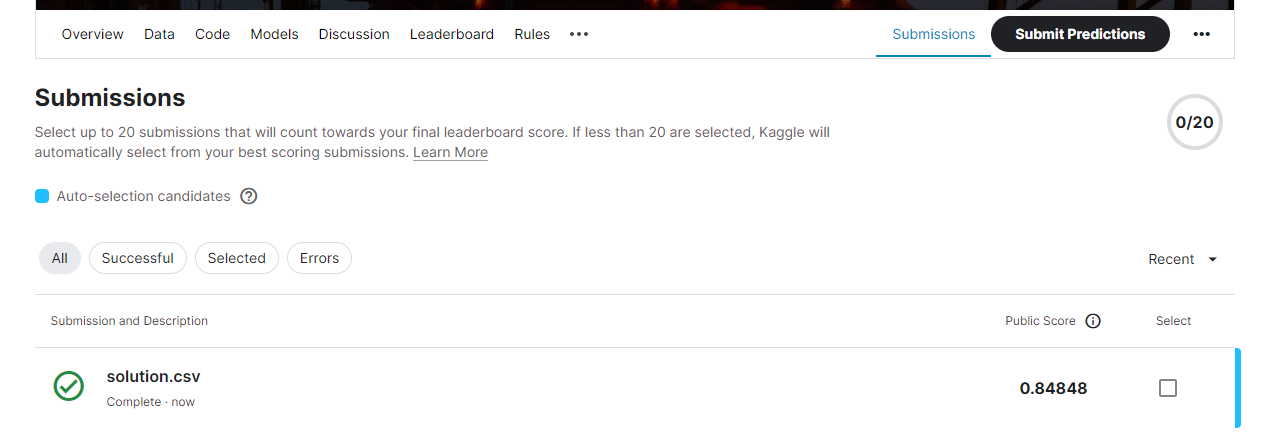

**Теперь подберем наилучшие параметры с помощью GridSearchCV.**

Попытаемя найти такие параметры модели, при которых решение дает еще бОльший результат. После того как найдем, еще раз на тесте предскажем и попробуем отправить в контест.

In [80]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = { 'n_estimators': range (10, 51, 10), # [10, 20, 30, 40, 50]
              'max_depth': range (1,13, 2), # 1, 3, 5, 7, 9, 11
              'min_samples_leaf': range (1,8), # 1,2,3,4,5,6,7
              'min_samples_split': range (2,10,2)} # 2,4,6,8
            #   10, 1, 1, 2
            # 10, 1, 1, 4

clf = RandomForestClassifier(random_state=42)

grid = GridSearchCV(clf, param_grid, cv=5)
grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


CPU times: user 4min 9s, sys: 1.13 s, total: 4min 10s
Wall time: 4min 21s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

In [ ]:
# всего 840! различных комбинаций гиперпараметров модели, которые мы будем перебирать
# чтобы найти наилучшую комбинацию
len(list(range(10, 51, 10)))*len(list(range (1,13, 2)))*len(list(range (1,8)))*len(list(range (2,10,2)))

840

`sklearn.model_selection.GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)`

**Параметры GridSearchCV:**

- estimator — модель которую хотим обучать (алгоритм);
- param_grid — передаем какие параметры хотим подбирать, GridSearchCV на всех параметрах попробует сделать обучение;
- CV — сколько разрезов кросс-валидации мы ходим сделать;
- scoring — выбор метрики ошибки (для разных задач можно выбрать разные функции ошибки).

In [ ]:
%%time
clf = RandomForestClassifier(random_state=42)

grid = GridSearchCV(clf, param_grid, cv=5)
grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


CPU times: user 3min 22s, sys: 1.57 s, total: 3min 23s
Wall time: 3min 23s


Атрибуты GridSearchCV:

*   best_estimator_ — лучшая модель
*   best_score_ — ошибка, полученная на лучшей модели.
*   best_params_ — гиперпараметры лучшей модели



In [ ]:
scores = pd.DataFrame(grid.cv_results_)
print(scores.shape)
scores.head()

(840, 17)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015788,0.001581,0.003226,0.000113,1,1,2,10,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.681818,0.697674,0.697674,0.697674,0.72093,0.699154,0.0125,701
1,0.028064,0.001355,0.004240,0.000132,1,1,2,20,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.681818,0.697674,0.697674,0.697674,0.72093,0.699154,0.0125,701
2,0.043848,0.005631,0.005807,0.000836,1,1,2,30,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.681818,0.697674,0.697674,0.697674,0.72093,0.699154,0.0125,701
3,0.055296,0.003508,0.006324,0.000134,1,1,2,40,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.681818,0.697674,0.697674,0.697674,0.72093,0.699154,0.0125,701
4,0.065157,0.002410,0.007732,0.000969,1,1,2,50,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.681818,0.697674,0.697674,0.697674,0.72093,0.699154,0.0125,701


In [ ]:
sc['mean_test_score'].max()

0.8057082452431288

In [ ]:
sc[sc['mean_test_score'] == sc['mean_test_score'].max()]['params'].values

array([{'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50},
       {'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 50}],
      dtype=object)

In [ ]:
sc = pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
sc.head()

,mean_test_score,std_test_score,params
0,0.699154,0.0125,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s..."
1,0.699154,0.0125,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s..."
2,0.699154,0.0125,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s..."
3,0.699154,0.0125,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s..."
4,0.699154,0.0125,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s..."


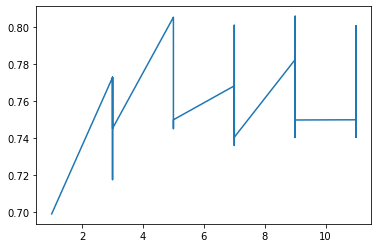

In [ ]:
plt.plot(scores.param_max_depth, scores.mean_test_score)

[Text(0, 0, "{'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}"),
 Text(0, 0, "{'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}"),
 Text(0, 0, "{'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}"),
 Text(0, 0, "{'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40}"),
 Text(0, 0, "{'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}"),
 Text(0, 0, "{'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 10}"),
 Text(0, 0, "{'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 20}")]

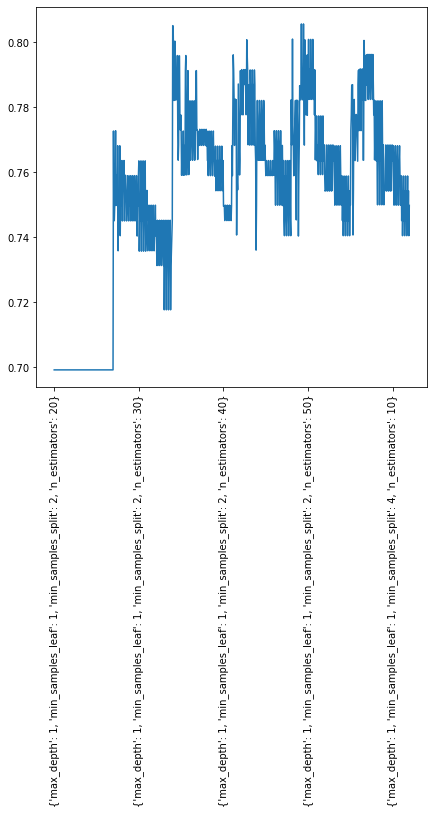

In [ ]:
plt.figure(figsize=(7,7))
ax = sc.mean_test_score.plot(rot=90)
ax.set_xticklabels(sc.params)

In [ ]:
grid.best_params_

{'max_depth': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 50}

In [ ]:
grid.best_score_

0.8057082452431288

In [ ]:
grid.best_estimator_

RandomForestClassifier(max_depth=9, min_samples_leaf=2, n_estimators=50,
                       random_state=42)

In [ ]:
clf = RandomForestClassifier(max_depth=9, min_samples_leaf=2, n_estimators=50, random_state=42)

clf.fit(X)

In [ ]:
clf.predict(X_test)

*По умолчанию в sklearn-овских методах n_jobs=1, т.е. случайный лес строится на одном процессоре. Если Вы хотите существенно ускорить построение, используйте n_jobs=-1 (строить на максимально возможном числе процессоров). Для построения воспроизводимых экспериментов используйте предустановку генератора псевдослучайных чисел: random_state.*

`sklearn.model_selection.RandomizedSearchCV(estimator, param_distributions, *, n_iter=10, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', random_state=None, error_score=nan, return_train_score=False)`

**Параметры RandomizedSearchCV:**
- estimator - модель
- param_distributions - набор гиперпараметров
- scoring - метод оценки алгоритма
- n_iter - количество итераций
- n_jobs = -1, использовать все ЦП для обучения, по умолчанию 1, использовать 1 ЦП

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV

param_grid2 = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }

clf1 = RandomForestClassifier(random_state=42)

grid1 = RandomizedSearchCV(clf1, param_grid2, cv = 3)

grid1.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


CPU times: user 2.55 s, sys: 23.8 ms, total: 2.57 s
Wall time: 2.9 s


In [ ]:
grid1.best_params_

{'max_depth': 7,
 'min_samples_leaf': 6,
 'min_samples_split': 6,
 'n_estimators': 40}

In [ ]:
grid1.best_score_

0.7685185185185185

In [ ]:
grid1.best_estimator_

RandomForestClassifier(max_depth=7, min_samples_leaf=6, min_samples_split=6,
                       n_estimators=40, random_state=42)

In [ ]:
pd.DataFrame(grid1.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.082319,0.010110,0.010469,0.000891,30,4,3,3,"{'n_estimators': 30, 'min_samples_split': 4, '...",0.708333,0.763889,0.722222,0.731481,0.023607,8
1,0.123508,0.019364,0.011922,0.000633,40,6,6,7,"{'n_estimators': 40, 'min_samples_split': 6, '...",0.763889,0.777778,0.763889,0.768519,0.006547,1
2,0.077665,0.003166,0.010533,0.000318,30,4,3,5,"{'n_estimators': 30, 'min_samples_split': 4, '...",0.736111,0.777778,0.791667,0.768519,0.023607,1
3,0.029690,0.003398,0.005744,0.000211,10,8,2,5,"{'n_estimators': 10, 'min_samples_split': 8, '...",0.722222,0.763889,0.763889,0.750000,0.019642,5
4,0.060286,0.008447,0.011116,0.003364,20,8,4,5,"{'n_estimators': 20, 'min_samples_split': 8, '...",0.722222,0.763889,0.722222,0.736111,0.019642,7
5,0.053603,0.006972,0.008161,0.000221,20,2,3,1,"{'n_estimators': 20, 'min_samples_split': 2, '...",0.694444,0.708333,0.694444,0.699074,0.006547,9
6,0.124047,0.015123,0.015855,0.002498,50,8,6,5,"{'n_estimators': 50, 'min_samples_split': 8, '...",0.750000,0.763889,0.750000,0.754630,0.006547,3
7,0.078071,0.005864,0.010584,0.000445,30,2,7,5,"{'n_estimators': 30, 'min_samples_split': 2, '...",0.722222,0.763889,0.777778,0.754630,0.023607,3
8,0.111681,0.023560,0.012243,0.000677,40,2,4,9,"{'n_estimators': 40, 'min_samples_split': 2, '...",0.736111,0.763889,0.750000,0.750000,0.011340,5
9,0.076036,0.007309,0.010087,0.000336,30,6,5,1,"{'n_estimators': 30, 'min_samples_split': 6, '...",0.694444,0.708333,0.694444,0.699074,0.006547,9


[Text(0, 0, "{'n_estimators': 30, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_depth': 3}"),
 Text(0, 0, "{'n_estimators': 40, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_depth': 7}"),
 Text(0, 0, "{'n_estimators': 30, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_depth': 5}"),
 Text(0, 0, "{'n_estimators': 10, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_depth': 5}"),
 Text(0, 0, "{'n_estimators': 20, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_depth': 5}"),
 Text(0, 0, "{'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 1}"),
 Text(0, 0, "{'n_estimators': 50, 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_depth': 5}")]

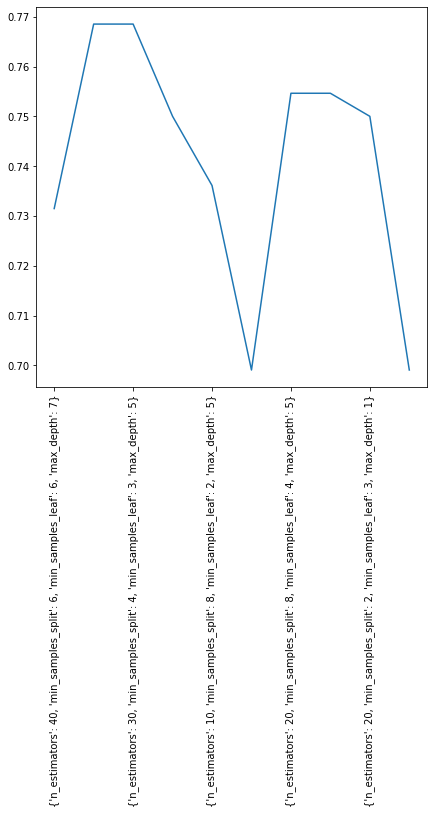

In [ ]:
plt.figure(figsize=(7,7))
ax = pd.DataFrame(grid1.cv_results_).mean_test_score.plot(rot=90)
ax.set_xticklabels(pd.DataFrame(grid1.cv_results_).params)

Мы обсудили оба подхода к настройке GridSearchCV и RandomizedSeachCV . Единственная разница между обоими подходами заключается в том, что при поиске по сетке мы определяем комбинации и проводим обучение модели, тогда как в RandomizedSearchCV модель выбирает комбинации случайным образом. Оба являются очень эффективными способами настройки параметров, повышающих обобщаемость модели.